# Course1:Task2 Investigate Customer Demographics

## Intro to Sci-Kit Learn

In [1]:
# Import the Libraries
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', palette = 'bright')

In [2]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [3]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


<Figure size 432x288 with 0 Axes>

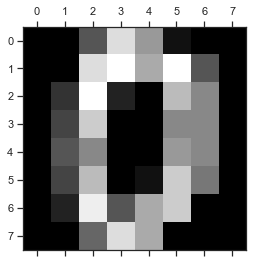

In [4]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

## The Learning

### Import the Libraries

In [6]:
#DS Basics
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt

In [7]:
#SKlearn Stuff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


# helper
%matplotlib inline

### Machine Learning

#### Import and Check Data File

In [8]:
#Import the file cleaned in part 1
data = pd.read_csv('Cleaned_Demographic_Data.csv')
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [9]:
#Check to see the type of data inclued
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79979 entries, 0 to 79978
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [11]:
data.describe()

,in-store,age,items,amount,region
count,79979.000000,79979.000000,79979.000000,79979.000000,79979.000000
mean,0.500006,45.758512,4.505133,835.825727,2.674915
std,0.500003,15.715158,2.061250,721.263650,1.126642
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.120000,2.000000
50%,1.000000,45.000000,4.000000,582.140000,3.000000
75%,1.000000,56.000000,6.000000,1233.400000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [16]:
data.groupby(['region', 'in-store']).describe()

age                                                      \
                   count       mean        std   min   25%   50%   75%   max   
region in-store                                                                
1      1         15997.0  43.704132  14.085525  19.0  32.0  43.0  53.0  74.0   
2      0         19994.0  56.609083  16.537368  28.0  42.0  57.0  71.0  85.0   
3      0          7001.0  40.480360  12.999613  18.0  30.0  40.0  52.0  63.0   
       1         10999.0  48.935540  14.312172  24.0  37.0  49.0  61.0  74.0   
4      0         12994.0  40.523857  12.956187  18.0  29.0  40.0  52.0  63.0   
       1         12994.0  36.980991  10.413310  19.0  28.0  37.0  46.0  55.0   

                   items            ...             amount               \
                   count      mean  ...  75%  max    count         mean   
region in-store                     ...                                   
1      1         15997.0  4.510283  ...  6.0  8.0  15997.0   744.990939   
2      0         19994.0  4.512804  ...  6.0  8.0  19994.0   252.097741   
3      0          7001.0  4.501500  ...  6.0  8.0   7001.0  1541.714097   
       1         10999.0  4.489226  ...  6.0  8.0  10999.0   520.948548   
4      0         12994.0  4.520009  ...  6.0  8.0  12994.0  1543.636092   
       1         12994.0  4.487533  ...  6.0  8.0  12994.0  1024.240622   

                                                                              
                        std       min       25%       50%       75%      max  
region in-store                                                               
1      1         492.989025   50.0500  358.9900   662.860   973.490  1999.80  
2      0         142.676946    5.0047  129.6300   250.205   374.920   499.94  
3      0         835.023712  100.2300  814.0900  1547.300  2256.400  3000.00  
       1         273.749047   50.1320  284.8100   517.940   757.410   999.81  
4      0         833.680490  100.2700  821.9150  1539.150  2256.575  3000.00  
       1         560.456633   50.6000  546.6725  1015.800  1510.150  1999.90  

[6 rows x 24 columns]

#### Look at the features with Correlation Heat Map

In [ ]:
#Correlation heat graph  Note:  Number of Items is very insignificant
plt.figure(figsize=(8,8))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output Variable
cor_target = abs(cor['region'])
#Selecting highly correlated features
relevent_features = cor_target[cor_target>0.1]
relevent_features
#items is not a relevent feature with reguards to region
# In-store is not a relevent feature with reguards to region

In [ ]:
# features
X = data.drop('region', axis=1)
print('Summary of feature Sample'), X.shape, X.head()

In [ ]:
#dependent variable
y = data['region']
y.shape

#### Modeling

In [ ]:
algos_Class = []
algos_Class.append(('Random Forest Classifier',RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier',DecisionTreeClassifier()))

In [ ]:
#classificaiton
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv = 4, scoring = 'accuracy')
    names.append(name)
    results.append(result)

In [ ]:
for i in range(len(names)):
    print(names[i], results[i].mean())

#### Train and Assess

In [ ]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                test_size = .3, random_state =123)

In [ ]:
#Modeling (Classification)
algo = DecisionTreeClassifier(max_depth = 5)
model = algo.fit(X_train, y_train)
print(model)

In [ ]:
#Predictions
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

In [ ]:
print("Accuracy for Decison Tree "), accuracy_score(y_test,predictions)

#### Check for the most accurate tree depth(max_depth)

In [ ]:
#List of Values to try for max_depth:
max_depth_range = list(range(1,6))

In [ ]:
#list to store the average RMSE for each value of max_depth:
accuracy =[]

In [ ]:
best_score=0
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    
    score = clf.score(X_test, y_test)
    accuracy.append(score)
    if score > best_score:
        best_score = score
        best_max_depth = depth
print("The most accurate model has an accuraccy of", best_score,"at max depth =", best_max_depth)   
accuracy

In [ ]:
depths=[1,2,3,4,5]
ax = sns.lineplot(x=depths,y=accuracy, color='red')
ax.set(xlabel='Max_Depth', ylabel='Accuracy')
sns.set_style('dark')
plt.show()

#### Decision Tree Graphs:  2 Methods Shown

In [ ]:
import pydot
import matplotlib.image as mping
import io
from sklearn import tree
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn import tree
import matplotlib as mpl

In [ ]:
region_values = ['1', '2', '3', '4']

In [ ]:
import graphviz
import pydotplus

dot_data = tree.export_graphviz(algo, out_file=None, filled=True, rounded=True, 
               feature_names=X.columns, class_names=region_values,
                label ='all', precision = 1, special_characters=True,)
graph=graphviz.Source(dot_data)
graph

In [ ]:
dot_data = StringIO()
export_graphviz(model, out_file = dot_data, filled = True, rounded=True,
                feature_names = X.columns, class_names=region_values, 
                precision=1,label='all')
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
graph.set_size('"100,100!"')
Image(graph.create_png())

## My Turn

### Discretize Age and Amount and Experiment with Bin Size


In [ ]:
data['age4'] =pd.cut(data['age'], bins=4, labels=[1,2,3,4]).astype('int64')
data['age6'] =pd.cut(data['age'], bins=6, labels=[1,2,3,4,5,6]).astype('int64')
data['age8'] =pd.cut(data['age'], bins=8, labels=[1,2,3,4,5,6,7,8]).astype('int64')
data['age10'] =pd.cut(data['age'], bins=10, labels=[1,2,3,4,5,6,7,8,9,10]).astype('int64')

data['amount4'] =pd.cut(data['amount'], bins=4, labels=[1,2,3,4]).astype('int64')
data['amount6'] =pd.cut(data['amount'], bins=6, labels=[1,2,3,4,5,6]).astype('int64')
data['amount8'] =pd.cut(data['amount'], bins=8, labels=[1,2,3,4,5,6,7,8]).astype('int64')
data['amount10'] =pd.cut(data['amount'], bins=10, labels=[1,2,3,4,5,6,7,8,9,10]).astype('int64')
data.head()


In [ ]:
y = data['region']
y.shape

In [ ]:
X = data[['in-store', 'items', 'amount6', 'age10' ]]
X.head()

In [ ]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                test_size = .3, random_state =100)

In [ ]:
#Modeling (Classification)
algo = DecisionTreeClassifier(max_depth=5, random_state=100)
model = algo.fit(X_train, y_train)
print(model)

In [ ]:
#Predictions
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

In [ ]:
#this is the best accuracy with binning ages.  10 bins
print("Accuracy for Decison Tree "), accuracy_score(y_test,predictions)*100

In [ ]:
#  Accuracy Results using binned ages and regions
# Age in 1/4  63.70
# Age in 1/6  63.63
# Age in 1/8  64.40
# Age in 1/10 64.60
# Amount in 1/4 62.71
# Amount in 1/6  64.91
# Amount in 1/8  63.19
# Amount in 1/10 63.96
# Put some of them together
# Age in 1/10 and Amount in 1/6 64.59
# Accrucacy of the Decision Tree Algoritm is in the 63-64ish range

###  What about items?  Are those even in the tree?  Why or why not?

In [ ]:
#  From the correlation heat map.  The number of items purchased has a 
# correlation coeffiecnt very close to 0 when compared to the other available
# features.  It does show up in my tree but that is because I have a max
# depth of 5.  Feautures such as In-Store and Amount have much larger predictive value.

### What about classifying where4 a transaction took place?  Can that be done successfully?


In [ ]:
##  I can say with a 64.91% accuracy that yes.  This was done when I 
## binned by spending abounts in bins of 1/6 size. 
##  I think it should be somewhat higer 
## in order to be called successful. 

## Answer the Questions

In [ ]:
grouped = data.groupby('region')
region1 = grouped.get_group(1)
region2 = grouped.get_group(2)
region3 = grouped.get_group(3)
region4 = grouped.get_group(4)


In [ ]:
sum1=region1['amount'].sum()
sum2=region2['amount'].sum()
sum3=region3['amount'].sum()
sum4=region4['amount'].sum()

In [ ]:

print(sum1,sum2, sum3, sum4)

In [ ]:
pd.cut(data['age'], bins=6, precision=0).value_counts()

In [ ]:
Age_Groups =['18-29', '30-40', '41-52', '53-63', '64-74', '75-85']

In [ ]:
ax=sns.countplot(x='region',data=data)
plt.xlabel('Region', fontsize=18)

In [ ]:
ax=sns.countplot(x='age6', data=data)
ax.set(xlabel='Age Group')

plt.show()

In [ ]:
ax=sns.countplot(x='age6',data=data, hue = 'in-store')
ax.set(xlabel='Age Group')
plt.show()

In [ ]:
ax=sns.barplot(x='in-store', y='amount' ,data=data, estimator=sum)
plt.xlabel('On-Line or In-Store', fontsize=18)
plt.ylabel("Total Sales in Millions of Dollars", fontsize=14)
plt.title('Total Sales In-Store vs On-Line', fontsize=20)
plt.xticks([0,1],['on-line', 'in-store'])
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
stores =['On-line', 'In-store']
amount =[35891990,30956520]
ax.pie(amount, labels=stores,autopct='%1.2f%%')
plt.title("Percent Sales in Millions of Dollars", fontsize=20)
plt.show()


In [ ]:
data.groupby('in-store').sum()

In [ ]:
A =[['In-Store', 35891990],['Online', 30956520]]
df = pd.DataFrame(A)
df


In [ ]:
ax=sns.countplot(x='region', data=data)
ax.set(ylabel='Total Transactions')
plt.title("Total Transactions per Region", fontsize=20)
plt.show()

In [ ]:
ax=sns.countplot(x='age6', data=data)
plt.xticks([0,1,2,3,4,5],['18-29', '30-40', '41-52', '53-63', '64-74', '75-85'])
plt.show()

In [ ]:
ax=sns.countplot(x='region', hue='in-store',data=data)
plt.title("Number of Transactions in each Region", fontsize=20)
plt.show()

In [ ]:
ax=sns.countplot(x="region", hue = 'age6', data=data)
plt.legend(title='Shoppers Age', loc='best' , labels=Age_Groups)
plt.show()

In [ ]:
ax=sns.countplot(x='age6', data=data)
plt.xticks([0,1,2,3,4,5],['18-29', '30-40', '41-52', '53-63', '64-74', '75-85'])
plt.title("Number of Transactions in each Age Group", fontsize=18)
plt.show()

In [ ]:
sns.set(style='ticks', palette = 'bright')
sns.boxplot(x='region', y = 'amount', data = data)
plt.ylabel("Average Transaction Amount", fontsize=14)
plt.title('Region vs Amount Spent')
plt.show()

In [ ]:
ax=sns.countplot(x="age6", hue = 'amount8', data=data)
ax.set(xlabel='Age Group')
plt.title('Age Groups vs Amount Spent')
plt.xticks([0,1,2,3,4,5],['18-29', '30-40', '41-52', '53-63', '64-74', '75-85'])
plt.show()

In [ ]:
sns.set(style='ticks', palette = 'bright')
sns.boxplot(x='region', y = 'amount', data = data)
plt.title("Average amount Spent/Region", fontsize=20)

#plt.show()plt.xticks([0,1,2,3,4,5],['18-29', '30-40', '41-52', '53-63', '64-74', '75-85'])

In [ ]:
sns.set(style='ticks', palette = 'bright')
sns.boxplot(x='region', y = 'age', hue='in-store',data = data)
plt.title("Average Age/Region In-Store & On-Line", fontsize=20)
plt.show()

In [ ]:
sns.barplot(x='region', y ='amount', hue = 'in-store', data=data, estimator=sum)

In [ ]:
sns.barplot(x='region', y ='amount', data=data, estimator=sum)
plt.title("Total Sales Each Region", fontsize=20)
plt.ylabel("Total Sales in Millions of Dollars", fontsize=14)
plt.show()

In [ ]:
sns.set(style='ticks', palette = 'bright')
sns.boxplot(x='in-store', y = 'age', data = data)
plt.title("Age on-line vs in-store", fontsize=20)
plt.xticks([0,1],['on-line', 'in-store'])
plt.show()

In [ ]:
sns.barplot(x='age6', y ='amount', hue = 'in-store', data=data, estimator=sum)
ax.set(ylabel='Total Sales per Age Group')
plt.xticks([0,1,2,3,4,5],['18-29', '30-40', '41-52', '53-63', '64-74', '75-85'])
plt.show()

In [ ]:
sns.barplot(x='age6', y ='amount', data=data, estimator=sum)

In [ ]:
grouped=data.groupby('in-store')
online = grouped.get_group(0).count()
instore = grouped.get_group(1).count()
print(online,instore)

In [ ]:
data.describe()

In [ ]:
sns.distplot(data['region'])

In [ ]:
sns.distplot(data['age'])

In [ ]:
sns.distplot(data['amount'])